In [465]:
import warnings
warnings.filterwarnings("ignore")

In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [469]:
df=pd.read_csv('credit_fraud_detection.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [471]:
df.shape

(100514, 19)

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [475]:
df.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

## Data cleaning

In [478]:
df.dropna(subset =["Maximum Open Credit","Bankruptcies"] ,inplace = True)

In [480]:
df.drop(columns = ["Loan ID","Customer ID","Months since last delinquent"],inplace = True)

In [482]:
df["Years in current job"].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

In [484]:
df['Years in current job'] = df['Years in current job'].apply(lambda x:0.9 if x=='< 1 year' else (11 if x=='10+ years' else(x[:1] if pd.isna(x)==False else x)))
df['Years in current job'] = pd.to_numeric(df['Years in current job'])
df['Years in current job'].fillna(df['Years in current job'].mode().values[0],inplace = True)

In [486]:
df["Annual Income"] = df["Annual Income"].fillna(df["Annual Income"].mean())

In [488]:
df["Credit Score"] = df["Credit Score"].apply(lambda x:np.nan if x>900 else x)

## finding outliers

In [492]:
col=df.select_dtypes(include='number')
col.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income',
       'Years in current job', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

In [494]:
col = ['Current Loan Amount','Annual Income','Current Credit Balance','Maximum Open Credit']
for i in col:
    Q1=df[i].quantile(0.25)
    Q2=df[i].quantile(0.50)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    positive = Q3+1.5*IQR
    negative = Q1-1.5*IQR
    df[i]=df[i].apply(lambda x:negative if x<negative else (positive if x>positive else x))

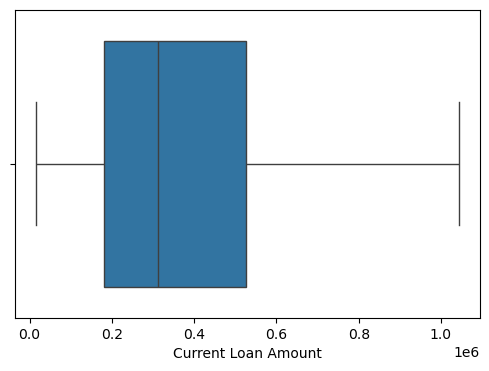

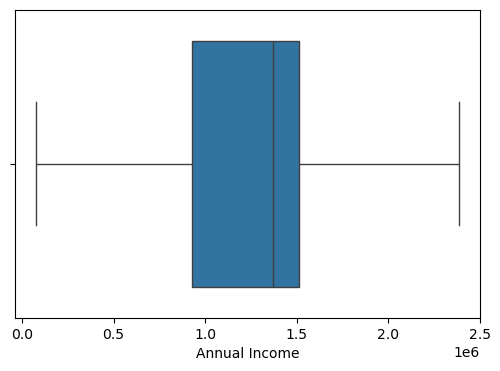

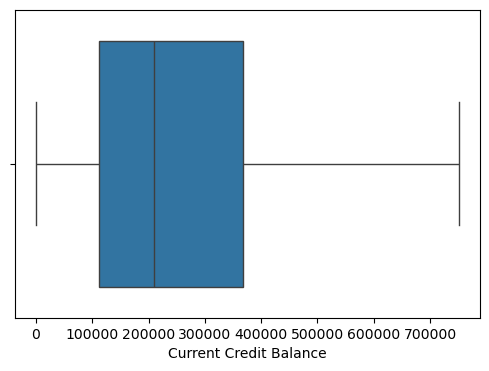

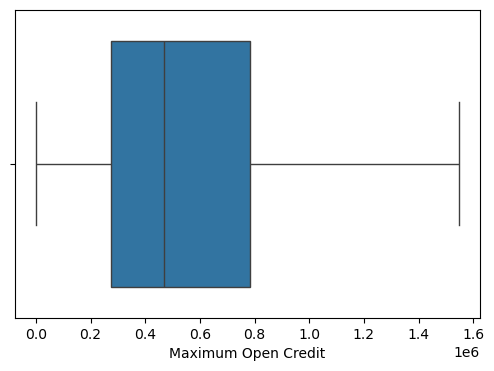

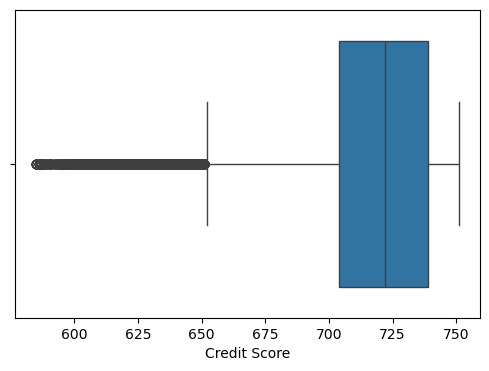

In [496]:
for j in col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[j])
    plt.show()
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Credit Score'])
plt.show()

In [497]:
df["Term"].value_counts()

Term
Short Term    72002
Long Term     27792
Name: count, dtype: int64

In [500]:
df["Term"] = df["Term"].apply(lambda x:1 if x=='Long Term' else 0)

In [502]:
df["Term"].unique()

array([0, 1], dtype=int64)

In [504]:
df["Home Ownership"] = df["Home Ownership"].apply(lambda x:0 if x=='Home Mortgage' else (1 if x=='Rent' else(2 if x=='Own Home' else 3)))

In [506]:
df["Home Ownership"].unique()

array([0, 2, 1, 3], dtype=int64)

In [661]:
df['Loan Status'] = df['Loan Status'].apply(lambda x:1 if x=='Fully Paid' else 0)

In [508]:
x_num_cols=df.select_dtypes(include='number')
x_num_cols.corr()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,0.194172,0.002192,0.261925,0.049219,-0.101069,0.241118,0.104257,0.115189,-0.045658,0.263723,0.259697,-0.057133,0.008061
Term,0.194172,1.000000,-0.463956,0.131313,0.053318,-0.095748,0.158201,0.042048,0.082463,-0.026520,0.160573,0.128101,-0.028962,-0.003569
Credit Score,0.002192,-0.463956,1.000000,0.000861,-0.016596,-0.039305,-0.089538,0.078674,-0.028879,-0.048985,-0.023351,0.123916,-0.036364,-0.020700
Annual Income,0.261925,0.131313,0.000861,1.000000,0.085187,-0.215526,0.535056,0.203997,0.199804,-0.023529,0.379880,0.364785,-0.053488,0.036263
Years in current job,0.049219,0.053318,-0.016596,0.085187,1.000000,-0.127592,0.103809,0.248935,0.038471,0.052319,0.128188,0.108761,0.052450,0.019038
Home Ownership,-0.101069,-0.095748,-0.039305,-0.215526,-0.127592,1.000000,-0.172623,-0.122753,-0.106597,0.004840,-0.163133,-0.151135,0.006192,0.000706
Monthly Debt,0.241118,0.158201,-0.089538,0.535056,0.103809,-0.172623,1.000000,0.199743,0.411185,-0.055744,0.534981,0.431163,-0.078977,0.020025
Years of Credit History,0.104257,0.042048,0.078674,0.203997,0.248935,-0.122753,0.199743,1.000000,0.132226,0.061887,0.264001,0.280172,0.066248,0.017345
Number of Open Accounts,0.115189,0.082463,-0.028879,0.199804,0.038471,-0.106597,0.411185,0.132226,1.000000,-0.014184,0.332146,0.451541,-0.024582,0.006499
Number of Credit Problems,-0.045658,-0.026520,-0.048985,-0.023529,0.052319,0.004840,-0.055744,0.061887,-0.014184,1.000000,-0.171019,-0.148997,0.752941,0.581352


In [510]:
df.describe()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,9.979400e+04,99794.000000,76143.000000,9.979400e+04,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,9.979400e+04,99794.000000,99794.000000
mean,3.963949e+05,0.278494,716.601973,1.304871e+06,6.497481,0.611740,18486.117117,18.193694,11.130910,0.168577,265489.136129,5.778981e+05,0.117743,0.029371
std,2.915129e+05,0.448260,28.122457,5.088349e+05,3.928053,0.658744,12172.465813,7.015261,5.007745,0.483087,200642.509456,4.024166e+05,0.351427,0.258433
min,1.542200e+04,0.000000,585.000000,7.662700e+04,0.900000,0.000000,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.796960e+05,0.000000,704.000000,9.312470e+05,3.000000,0.000000,10228.317500,13.500000,8.000000,0.000000,112769.750000,2.735260e+05,0.000000,0.000000
50%,3.124770e+05,0.000000,722.000000,1.370052e+06,6.000000,1.000000,16237.210000,16.900000,10.000000,0.000000,209912.000000,4.678740e+05,0.000000,0.000000
75%,5.250960e+05,1.000000,739.000000,1.512884e+06,11.000000,1.000000,24025.215000,21.700000,14.000000,0.000000,368068.000000,7.828260e+05,0.000000,0.000000
max,1.043196e+06,1.000000,751.000000,2.385341e+06,11.000000,3.000000,435843.280000,70.500000,76.000000,15.000000,751015.375000,1.546776e+06,7.000000,15.000000


## Building Model

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99794 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                99794 non-null  object 
 1   Current Loan Amount        99794 non-null  float64
 2   Term                       99794 non-null  int64  
 3   Credit Score               76143 non-null  float64
 4   Annual Income              99794 non-null  float64
 5   Years in current job       99794 non-null  float64
 6   Home Ownership             99794 non-null  int64  
 7   Purpose                    99794 non-null  object 
 8   Monthly Debt               99794 non-null  float64
 9   Years of Credit History    99794 non-null  float64
 10  Number of Open Accounts    99794 non-null  float64
 11  Number of Credit Problems  99794 non-null  float64
 12  Current Credit Balance     99794 non-null  float64
 13  Maximum Open Credit        99794 non-null  float64


In [515]:
df1 = df[(df['Credit Score'].isnull()==False)]
df2 = df[(df['Credit Score'].isnull()==True)]

In [519]:
df1.shape

(76143, 16)

In [521]:
x = df1[["Current Loan Amount","Loan Status","Term","Annual Income","Years in current job",
         "Home Ownership","Purpose","Monthly Debt","Years of Credit History",
         "Number of Open Accounts","Number of Credit Problems","Current Credit Balance",
         "Maximum Open Credit","Bankruptcies","Tax Liens"]]

In [523]:
y = df1["Credit Score"]

In [525]:
x_cat_cols = x.select_dtypes(include = 'object')
x_num_cols = x.select_dtypes(include = 'number')

In [527]:
x_cat_cols.head()

,Loan Status,Purpose
0,Fully Paid,Home Improvements
2,Fully Paid,Debt Consolidation
3,Fully Paid,Debt Consolidation
6,Fully Paid,Debt Consolidation
8,Fully Paid,Debt Consolidation


In [657]:
x_cat_cols = pd.get_dummies(x_cat_cols,dtype='int')

In [659]:
x = pd.concat([x_cat_cols,x_num_cols],axis=1)


In [533]:
from sklearn.model_selection import train_test_split #sci-kit learn
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [535]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10, random_state = 8)

In [537]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(68528, 31) (7615, 31) (68528,) (7615,)


In [539]:
x_test.head()

,Loan Status_Charged Off,Loan Status_Fully Paid,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,...,Years in current job,Home Ownership,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
92989,0,1,0,0,0,1,0,0,0,0,...,11.0,1,28336.98,19.3,18.0,0.0,255436.0,620070.0,0.0,0.0
17016,0,1,0,0,0,0,0,1,0,0,...,2.0,1,2723.84,8.3,7.0,0.0,36841.0,198440.0,0.0,0.0
25512,0,1,0,0,0,1,0,0,0,0,...,5.0,1,10574.07,5.3,7.0,0.0,91105.0,184096.0,0.0,0.0
82927,0,1,0,0,0,1,0,0,0,0,...,3.0,0,7915.02,14.8,13.0,0.0,116318.0,975964.0,0.0,0.0
85104,0,1,0,0,0,1,0,0,0,0,...,11.0,0,29110.47,15.0,11.0,1.0,133817.0,396286.0,1.0,0.0


## model training

In [542]:
model = LinearRegression() # model initilization

In [544]:
model.fit(x_train,y_train)

LinearRegression()

## model testing

In [547]:
test_predictions = model.predict(x_test)
test_predictions

array([721.82719541, 724.43084261, 723.97843317, ..., 683.15211818,
       718.65762643, 696.18300722])

In [549]:
y_test

92989    713.0
17016    744.0
25512    733.0
82927    749.0
85104    738.0
         ...  
31702    693.0
36934    658.0
51865    684.0
67606    605.0
93438    693.0
Name: Credit Score, Length: 7615, dtype: float64

In [551]:
train_predictions=model.predict(x_train)

In [553]:
print("Test Mean Squared Error: ",mean_squared_error(y_test,test_predictions))

Test Mean Squared Error:  547.3256599886838


In [555]:
print("Train Mean Squared Error: ",mean_squared_error(y_train,train_predictions))

Train Mean Squared Error:  534.5638978692742


In [557]:
print("Test R2 Score: ",r2_score(y_test,test_predictions))

Test R2 Score:  0.3125496150126459


In [559]:
print("Train R2 Score: ",r2_score(y_train,train_predictions))

Train R2 Score:  0.32356389450373213


## Ridge Model

In [562]:
ridge_model = Ridge(alpha = 0.01)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.01)

In [564]:
rigde_test=ridge_model.predict(x_test)
rigde_train=ridge_model.predict(x_train)

In [566]:
print("Ridge Model MSE of Train: ",mean_squared_error(y_train,rigde_train))

Ridge Model MSE of Train:  534.5638979173887


In [568]:
print("Ridge Model MSE of Test: ",mean_squared_error(y_test,rigde_test))

Ridge Model MSE of Test:  547.3256862472247


In [570]:
print("Ridge Model Train R^2 value: ",r2_score(y_train,rigde_train)*100)

Ridge Model Train R^2 value:  32.35638944428483


In [572]:
print("Ridge Model Test R^2 value: ",r2_score(y_test,rigde_test)*100)

Ridge Model Test R^2 value:  31.254958203146966


## Lasso Model

In [575]:
Lasso_model=Lasso(alpha=0.01)
Lasso_model.fit(x_train,y_train)

Lasso(alpha=0.01)

In [576]:
Lasso_test=Lasso_model.predict(x_test)
Lasso_train = Lasso_model.predict(x_train)

In [579]:
print("Lasso Model MSE of Train: ",mean_squared_error(y_train,Lasso_train))

Lasso Model MSE of Train:  534.8448754159525


In [581]:
print("Lasso Model MSE of Test: ",mean_squared_error(y_test,Lasso_test))

Lasso Model MSE of Test:  547.7170272094105


In [583]:
print("Lasso Model Train R^2 value: ",r2_score(y_train,Lasso_train)*100)

Lasso Model Train R^2 value:  32.32083460685226


In [585]:
print("Lasso Model Test R^2 value: ",r2_score(y_test,Lasso_test)*100)

Lasso Model Test R^2 value:  31.20580510933413


In [587]:
Lasso_test

array([721.80671318, 724.23981657, 723.95706649, ..., 683.30084969,
       718.43243272, 696.15941385])

In [589]:
y_test

92989    713.0
17016    744.0
25512    733.0
82927    749.0
85104    738.0
         ...  
31702    693.0
36934    658.0
51865    684.0
67606    605.0
93438    693.0
Name: Credit Score, Length: 7615, dtype: float64

In [619]:
X = df2[["Current Loan Amount","Loan Status","Term","Annual Income","Years in current job",
         "Home Ownership","Purpose","Monthly Debt","Years of Credit History",
         "Number of Open Accounts","Number of Credit Problems","Current Credit Balance",
         "Maximum Open Credit","Bankruptcies","Tax Liens"]]

In [621]:
X_cat_cols = X.select_dtypes(include='object')
X_num_cols = X.select_dtypes(include='number')

In [623]:
X_cat_cols = pd.get_dummies(X_cat_cols,dtype='int')

In [625]:
X = pd.concat([X_cat_cols, X_num_cols], axis=1)

In [627]:
cf = model.predict(X)
df2['Credit Score'] = cf

In [629]:
df = pd.concat([df1, df2], axis=0)

In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99794 entries, 0 to 99992
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                99794 non-null  object 
 1   Current Loan Amount        99794 non-null  float64
 2   Term                       99794 non-null  int64  
 3   Credit Score               99794 non-null  float64
 4   Annual Income              99794 non-null  float64
 5   Years in current job       99794 non-null  float64
 6   Home Ownership             99794 non-null  int64  
 7   Purpose                    99794 non-null  object 
 8   Monthly Debt               99794 non-null  float64
 9   Years of Credit History    99794 non-null  float64
 10  Number of Open Accounts    99794 non-null  float64
 11  Number of Credit Problems  99794 non-null  float64
 12  Current Credit Balance     99794 non-null  float64
 13  Maximum Open Credit        99794 non-null  float64


## classification model

In [636]:
x = df2[["Current Loan Amount","Term","Credit Score","Annual Income","Years in current job",
         "Home Ownership","Purpose","Monthly Debt","Years of Credit History",
         "Number of Open Accounts","Number of Credit Problems","Current Credit Balance",
         "Maximum Open Credit","Bankruptcies","Tax Liens"]]

In [638]:
y = df2['Loan Status']

In [640]:
x_cat_cols = x.select_dtypes(include = 'object')
x_num_cols = x.select_dtypes(include = 'number')

In [642]:
x_cat_cols = pd.get_dummies(x_cat_cols,dtype='int')

In [644]:
x = pd.concat([X_cat_cols, X_num_cols], axis=1)

In [646]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state = 42)

## KNN

In [649]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3) # init (k = 3)

In [651]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [653]:
y_pred=classifier.predict(x_test)
train_pred=classifier.predict(x_train)

In [654]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train Accuracy:",accuracy_score(y_train, train_pred)*100)
print("Test Accuracy:",accuracy_score(y_test, y_pred)*100)

[[1121  875]
 [ 565 2170]]
              precision    recall  f1-score   support

 Charged Off       0.66      0.56      0.61      1996
  Fully Paid       0.71      0.79      0.75      2735

    accuracy                           0.70      4731
   macro avg       0.69      0.68      0.68      4731
weighted avg       0.69      0.70      0.69      4731

Train Accuracy: 83.21881606765328
Test Accuracy: 69.56246036778694


# Gaussian_Naive_Bayes

In [412]:
from sklearn.naive_bayes import GaussianNB

In [414]:
clf = GaussianNB(var_smoothing=0.001)
clf.fit(x_train,y_train)

GaussianNB(var_smoothing=0.001)

In [416]:
train_predictions = clf.predict(x_train)
test_predictions = clf.predict(x_test)

In [418]:
print(confusion_matrix(y_test, test_predictions))

print(classification_report(y_test, test_predictions))

print("Train Accuracy:",accuracy_score(y_train, train_predictions)*100)
print("Test Accuracy:",accuracy_score(y_test, test_predictions)*100)

[[ 895 1101]
 [   0 2735]]
              precision    recall  f1-score   support

 Charged Off       1.00      0.45      0.62      1996
  Fully Paid       0.71      1.00      0.83      2735

    accuracy                           0.77      4731
   macro avg       0.86      0.72      0.73      4731
weighted avg       0.83      0.77      0.74      4731

Train Accuracy: 76.29492600422833
Test Accuracy: 76.72796448953709


# Decision Tree

In [421]:
from sklearn.tree import DecisionTreeClassifier

In [423]:
DecisionTree_model=DecisionTreeClassifier(criterion='entropy',class_weight='balanced')
DecisionTree_model.fit(x_train,y_train)
train_predictions=DecisionTree_model.predict(x_train)
test_predictions=DecisionTree_model.predict(x_test)

In [425]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, test_predictions))

print(classification_report(y_test, test_predictions))

print("Train Accuracy:",accuracy_score(y_train, train_predictions)*100)
print("Test Accuracy:",accuracy_score(y_test, test_predictions)*100)

[[1996    0]
 [   0 2735]]
              precision    recall  f1-score   support

 Charged Off       1.00      1.00      1.00      1996
  Fully Paid       1.00      1.00      1.00      2735

    accuracy                           1.00      4731
   macro avg       1.00      1.00      1.00      4731
weighted avg       1.00      1.00      1.00      4731

Train Accuracy: 100.0
Test Accuracy: 100.0


# RandomForest Classifier

In [428]:
from sklearn.ensemble import RandomForestClassifier

In [430]:
rf=RandomForestClassifier(n_estimators=99,oob_score=True,class_weight='balanced',max_depth=None,max_features='sqrt') #initializtion
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=99, oob_score=True)

In [431]:
train_predictions=rf.predict(x_train)
test_predictions=rf.predict(x_test)

In [434]:
print(confusion_matrix(y_test, test_predictions))

print(classification_report(y_test, test_predictions))

print("Train Accuracy:",accuracy_score(y_train, train_predictions)*100)
print("Test Accuracy:",accuracy_score(y_test, test_predictions)*100)

[[1996    0]
 [   0 2735]]
              precision    recall  f1-score   support

 Charged Off       1.00      1.00      1.00      1996
  Fully Paid       1.00      1.00      1.00      2735

    accuracy                           1.00      4731
   macro avg       1.00      1.00      1.00      4731
weighted avg       1.00      1.00      1.00      4731

Train Accuracy: 100.0
Test Accuracy: 100.0
